회기
분류
앙상블
군집

## k-NN(k-최근접 이웃)
- 회귀와 분류에서 모두 사용됨
- 예측을 하고싶은 데이터에 가장 가까운 k개의 훈련데이터를 찾아낸다
- 분류일 때 k개 중 다수인 클레스가 레이블로 추출된다
- 회귀일 때 k개의 레이블의 평균이 레이블로 추출된다


- k가 너무 커지면 과소적합, 너무 작아지면 과대적합 발생
- 특성의 개수가 너무 크면 예측이 느려짐
- test데이터가 train 데이터의 범위를 벗어나면 제대로 된 예측을 할 수 없음


- 분류 : KNeighborsClassifier()
- 회귀 : KNeighborsRegressor()

```
# 주요 파라미터 #
n_neighboers = : k를 몇개의 값으로 할지 (default=5)
p = 1 or 2 : 1-맨하탄 거리, 2-유클리디안 거리(default=2)
Weights = uniform(이웃에 동일한 가중치) or distance(가까운 이웃에 큰 가중치) (default=uniform)
```

```
# 기타 파라미터#
lgorithm = 'ball_tree','kd_tree','brute','auto' : 알고리즘 선택 ('auto'는 자동으로 적합한 것을 찾음)
leaf_size : 'ball_tree','kd_tree' 사용 시에 설정할 leaf size, 너무작으면 느리고 너무크면 성능이 낮음
```

In [4]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

## 선형회귀 
- 특성을 가장 잘 나타내는 직선을 찾음
- 가중치의 개념이 도입됨
- 정규방정식을 이용 / 경사하강법을 이용 의 경우가 있음

1. 정규방정식을 이용한 선형회귀
    - 행렬을 이용해서 가중치를 구함


2. 경사하강법을 이용한 선형회귀
    - MSE의 비용함수를 이용해 가중치를 구함
    - 미분을 통해 MSE의 최저점을 구하기 위한 행위를 반복
    - 학습률 설정에 따라 지역최소값에 수렴할 수 있음
    - 진행속도가 매우 느림 -> 개선 : 확률적 경사하강법

 확률적 경사하강법
- 전체 데이터를 사용하는 것이 아니라, 랜덤하게 추출한 일부 데이터를 사용
- 최저점에 가까운 점을 찾을 가능성이 높지만 항상 보장되지는 않음.
- 분류에도 사용 가능

- 정규방정식 : LinearRegression()
- 확률적경사하강법 : SGDRegressor()

```
# 주요 파라미터 # - SGDRegressor
loss = : 어떤 종류의 비용(손실)함수를 사용할것인가 (default='squared_error')
penalty = l2', 'l1', 'elasticnet' : 어떤 종류의 규제를 사용할것인가 (default='l2') -> 규제모델 참고
max_iter : epochs 를 뜻함 (default=1000)
eta0 : 학습률 (default=0.01)

```

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor,SGDClassifier

### 규제모델
- 규제가 있는 선형회귀모델 
1. Lasso : L1규제(비용함수에 norm의 제곱추가)
2. Ridge : L2규제(비용함수에 norm을 추가)
3. ElasticNet : L1+L2규제 (r=0이면 ridge, r=1이면 lasso)

```
# 주요 파라미터 # 

- Ridge, Lasso
alpha= : 규제에 얼마나 큰 가중을 줄것인지 (default= 1.0)

- ElasticNet 
alpha= : 규제에 얼마나 큰 가중을 줄것인지 (default= 1.0)
l1_ratio : 0이면 ridge, 1이면 lasso(default= 0.5)
```

In [5]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## 다항회귀
- 회귀식이 2차 이상의 방정식과 같은 다항식으로 표현됨
- 각 특성의 제곱을 새로운 특정으로 추가 
- 변환기를 이용해 데이터를 변형시킨 후 선형회기와 동일한 과정을 취함

- 제곱항 추가하기

```
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures() 
X_poly = poly_features.fit_transform(X)
```

```
# 주요 파라미터 #
degree : 최대 몇승의 값까지 만들어낼것인지 (default= 2)
include_bias : 편향값을 특성에 포함할 것인지 (default= False)
interaction_only : True를 설정할 시 특성간에 상호곱만 표현 (default= False)
```

In [11]:
from sklearn.preprocessing import PolynomialFeatures

## 로지스틱 회귀
- 분류에 사용됨
- 선형회귀의 방식을 이용함
- 선형회귀로 얻어진 값을 시그모이드 or 소프트맥스함수에 통과시켜 확률값으로 변경 -> 확률에 따라 분류를 실시
- 이진분류 : 시그모이드 함수를 사용
    - 시그모이드의 출력이 0.5보다 작으면 음성, 크면 양성
- 다중분류 : 소프트맥스 함수를 사용
    - 가장 큰 확률값으로 출력된 label을 따름

    * 선형회귀의 일종이기 때문에 선형회귀예하 파라미터와 동일한 파라미터를들을 갖는다

In [3]:
from sklearn.linear_model import LogisticRegression

## 결정트리
- 회귀와 분류에서 모두 사용
- 복잡한 데이터에도 사용 가능
- 직관적인 모델 : 그래프로 확인 가능
- 모델 스스로 학습을 통해 분류규칙을 만들어냄
- 회기모델 :RSS(오차 제곱합)를 가장 잘 줄일 수 있는 변수를 기준으로 분류해 값을 예측
    - 그룹에 따라 예측값이 동일함

```
지니불순도 : 노드의 샘플 클래스가 얼마나 깔끔하게 분리되었는지 알 수 있는 척도

-> 1 - (양성클래스비율**2 +음성클래스비율**2)
-> 0에 가까울수록 불순도가 낮음
```

```
#주요 파라미터#
max_deprh : 트리의 최대 깊이 (default=None) 
min_saples_split : 분할되기 위해 노드가 가져야하는 최소의 샘플수 (default=2) 
min_saples_leaf : 리프 노드가 가지고 있어야할 최소 샘플수 (default=1)
max_leaf_nodes : 리프 노드의 최대 수 (default=None)
max_features : 각 노드에서 분할에 사용할 특성의 최대 수 (default=None)
min_impurity_decrease : 분할로 얻어질 최소한의 불순도 (default=0)
```

In [2]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 그래프 그리기
from sklearn import tree
tree.plot_tree(모델)

## 서포트 벡터 머신 
- 회귀, 분류, 이상치 탐색에 모두 사용가능
- 선형 비선형에 모두 적용
- 앙상블, 신경망 개념이 나오기 전에 많이 사용됨

- 결정 경계, 즉 분류를 위한 기준 선을 정의하는 모델
- 마진 : 결정 경계와 서포터 벡터 사이의 거리
- 최적의 결정경계는 마진을 최대로 한다
- 스케일링을 조정하면 결정경계가 훨씬 좋아진다

- 하드마진 : 모든 샘플을 마진 바깥쪽으로 분류, 데이터가 선형적으로 구분가능해야함, 이상치에 민감
- 소프트마진 : 마진 평면을 넘어가는 인스턴스를 허용, 마진 평면을 넘어가는 인스턴스에 페널티를 부과
    - c 파라미터를 이용해 조절
    - c가 클 경우 : 마진이 작아지고 하드마진에 가까워짐 
    - c가 작을 경우 : 마진이 커지고 규제가 적어짐

In [8]:
from sklearn.svm import LinearSVC, LinearSVR
# 비선형은 다중회귀와 같이 PolynomialFeatures를 사용

## 앙상블 
- 회귀와 분류 모두 사용
- 여러 가지 동일한 종류 또는 상이한 모형들의 결과를 종합하여 최종 의사결정에 반영
- 보팅, 배깅, 부스팅 등이 존재

### 보팅 
- 서로 다른 알고리즘의 예측을 모아 다수결 투표
- hard / soft의 유형이 있음
- hard : 다수결을 이용해 최종 결정
- soft : 확률들을 평균을 내서 최종 결정

```
#주요 파라미터#
estimators : 투표에 참여할 모델들 [('별명',estimators)]의 형식으로 입력해준다
voting : hard or soft 중에 선택 (default='hard')
- Regressor 는 voting을 선택하지 않음

```

In [12]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

### 배깅 
- 하나의 알고리즘을 이용해 중복을 허용해 샘플을 여러개 뽑아(boostrap) 각 샘플들의 결과물을 집계
- 중복을 허용하지 않으면 페이스팅
- 검증까지 실시할 수 있음

```
#주요 파라미터#
base_estimator : 사용할 모델
n_estimators : 사용할 모델의 개수(default=10)
bootstrap = True or False : True - 배깅(중복허용), False - 패이스팅(중복비허용) (default=True)
max_samples : 몇퍼센트의 샘플을 추출해서 사용할지 (default=1.0)
oob_score : 추출되지 않은 샘플들을 이용해서 검증을 실시하는지 결정 (default=False)
```

In [13]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

### 랜덤 포레스트 
- 배깅의 대표적인 모델
- 배깅방식을 적용한 결정트리의 앙상블

- Extratree : 샘플을 랜덤하지 않은 방식으로 뽑아내는 모델 
- 랜덤포레스트와 작동방식은 동일


```
#주요 파라미터#
n_estimators : 랜덤포레스트를 구성하는 결정트리 수
bootstrap : true(랜덤한방식, 랜덤포레스트), False(랜덤하지않은방식,엑스트라트리)

나머지는 결정트리의 파라미터와 동일
```

In [3]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### 부스팅
- 연속적인 약한 학습기(weaklearner)들을 여러 개 결합해 이루어짐
- 연속적으로 이루어져 이전 결과에 오차를 보안해 다음 결과를 이끌어냄
- 대표모델에는 AdaBoost, Gradient Boost이 있음
- Gradient Boost의 변형 모델로는 XGBoost, LightGBM, CatBoost이 있음
- 결정트리를 사용

#### AdaBoost
- 노드 하나에 두개의 리프(leaf)를 지닌 트리를 stump
- AdaBoost는 여러 개의 stump로 구성
- 이전의 stump에서 발생한 에러가 다음 stump에 영향을 줌

```
#주요파라미터#
base_estimator :사용되는 결정트리를 변경할 수 있음 (default= max_depth가1인 결정트리) / (회귀의 경우 default = 3)
n_estimators : 사용되는 모델의 개수
learning_rate : 학습율
```

In [21]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

#### Gradient Boost
- stump나 tree가 아닌 하나의 leaf부터 시작
- 위의 leaf는 타겟 값에 대한 초기 추정 값을 나타냄
- tree의 에러가 다음  tree에 영향을 줌

```
#주요 파라미터#
learning_rate : 학습율
subsample : 학습기에 사용되는 데이터의 비율을 지정

나머지는 결정트리의 파라미터와 동일
```

In [20]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor

##### HistGradientBoosting
- 히스토그램 기반의 그레이디언트 부스팅
- 입력특성을 256개의 구간으로 나눠 최적의 분할을 매우 빠르게 찾음
- 256개의 구간 중 하나를 결측치 위해 남겨놓게 때문에 결측치 전처리과정이 필요하지않다


- 아직 테스트 과정에 있음  (from sklearn.experimental import enable_hist_gradient_boosting)

In [1]:
from sklearn.ensemble import HistGradientBoostingClassifier

##### XGBoost
- Gradient Boost의 병렬학습을 지원한 라이브러리
- level-wise tree

In [27]:
from xgboost import XGBClassifier, XGBRegressor

##### LightGBM
- 수직적으로 확장되는 트리 (leaf-wise)
- 다른 모델에 비해 손실이 더 적음
- 큰 모델에 대해서는 속도가 빠른 이점이 있지만 작은 데이터에는 비적합
- 파라미터 튜닝이 복잡함

In [5]:
import lightgbm

# 비지도 학습

## k-평균
- 데이터를 군집화 해주는 모델
- k를 어떻게 지정하느냐에 따라 군집개수가 달라짐
- 반복회수를 너무 적게하면 정확한 군집을 얻을 수 없음

- 작동방식
1. 군집의 개수를 설정(k개)
2. 초기 중심점 생성 
3. 데이터를 군집에 할당
4. 중심점을 군집의 중심으로 재 할당
5. 데이터를 군집에 재할당 
6. 4,5 번 행위를 중심점의 위치가 변하지 않을 때 까지 반복

- labels_ : 어떤 군집에 속하는지 확인
- cluster_centers_ : 각 클러스터들의 센트로이드(중심) 확인

### 최적의 k찾기 : 엘보우 방법

- 이너셔
    - 클러스터 중심과 클러스터에 속한 샘플 사이 거리의 제곱 합
    - 클러스트에 속한 샘플들이 얼마나 가깝게 모여있는지를 나타내는 값(작을수록 군집이 잘 되어있다)
    - inertia_로 확인가능

- k에 따른 이너셔의 그래프를 그려서 최적의 k확인

ex) 4가 최적의 클러스터 개수 

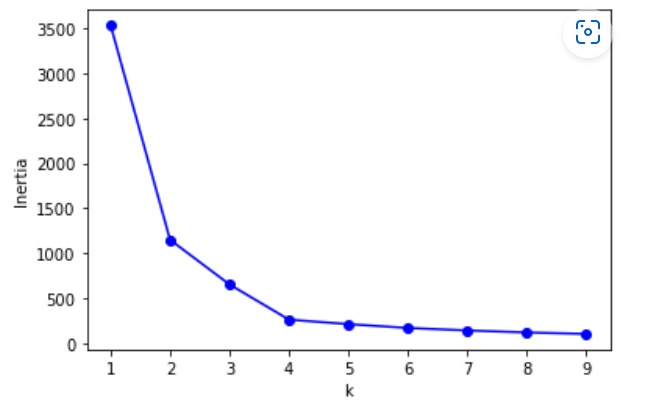

```
k_means_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in k_means_per_k]

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("Inertia")
```

### 최적의 k찾기 : 실루엣 방법
- 실루엣 계수
     - 각 데이터가 해당 데이터와 같은 군집 내의 데이터와는 얼마나 가깝고, 다른 군집에 있는 데이터와는 얼마나 먼지를 나타내는 지표 
    - -1~1의 값, 1에 가까울수록 군집화가 잘된것을 나타냄
    - silhouette_score(데이터, 데이터.labels_) 로 구함
- k에 따른 이너셔의 그래프를 그려서 최적의 k확인

ex) 4가 최적의 클러스터 개수
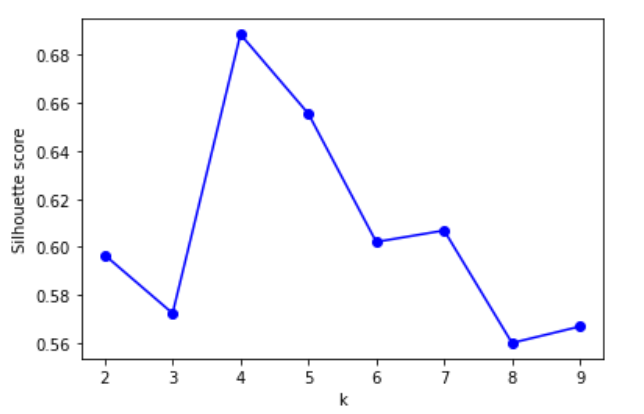

```
k_means_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in k_means_per_k]

silhouette_scores = [silhouette_score(X, model.labels_) for model in k_means_per_k]

plt.plot(range(1, 10), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette score")

```

- 실루엣 다이어그램 군집수를 이용
- 평균선을 많이 넘지않는 클러스트의 개수가 적절
- 참고 : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html?highlight=selecting%20number%20cluster

```
#주요파라미터#
n_clusters : 몇개의 클러스트를 만들지 (
n_init : 초기 중심위치 시도 횟수, n개중 가장 좋은 초기값을 설정 
max_iter : 몇번 반복 수행하면서 클러스트를 최적화할지
```

In [9]:
from sklearn.cluster import KMeans